### Name : Muhammad Mubeen
### College of Resources & Environment, UCAS
### Course : Data Science
### Project : 1
### Dataset : Wine Quality
### Model : Logestic Regression

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')

%matplotlib inline

In [187]:
df = pd.read_csv('winequality-red.csv')

In [188]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [189]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [191]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

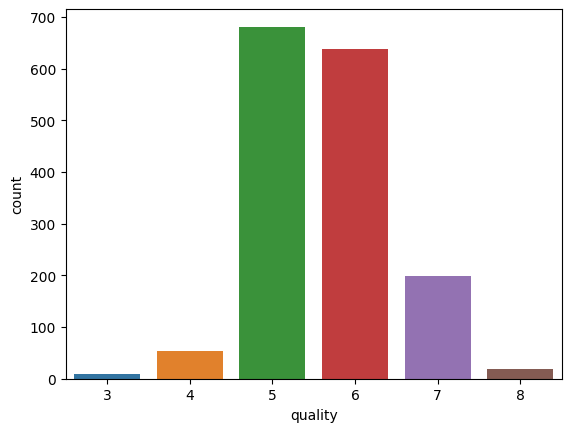

In [192]:
sns.countplot(df['quality'])

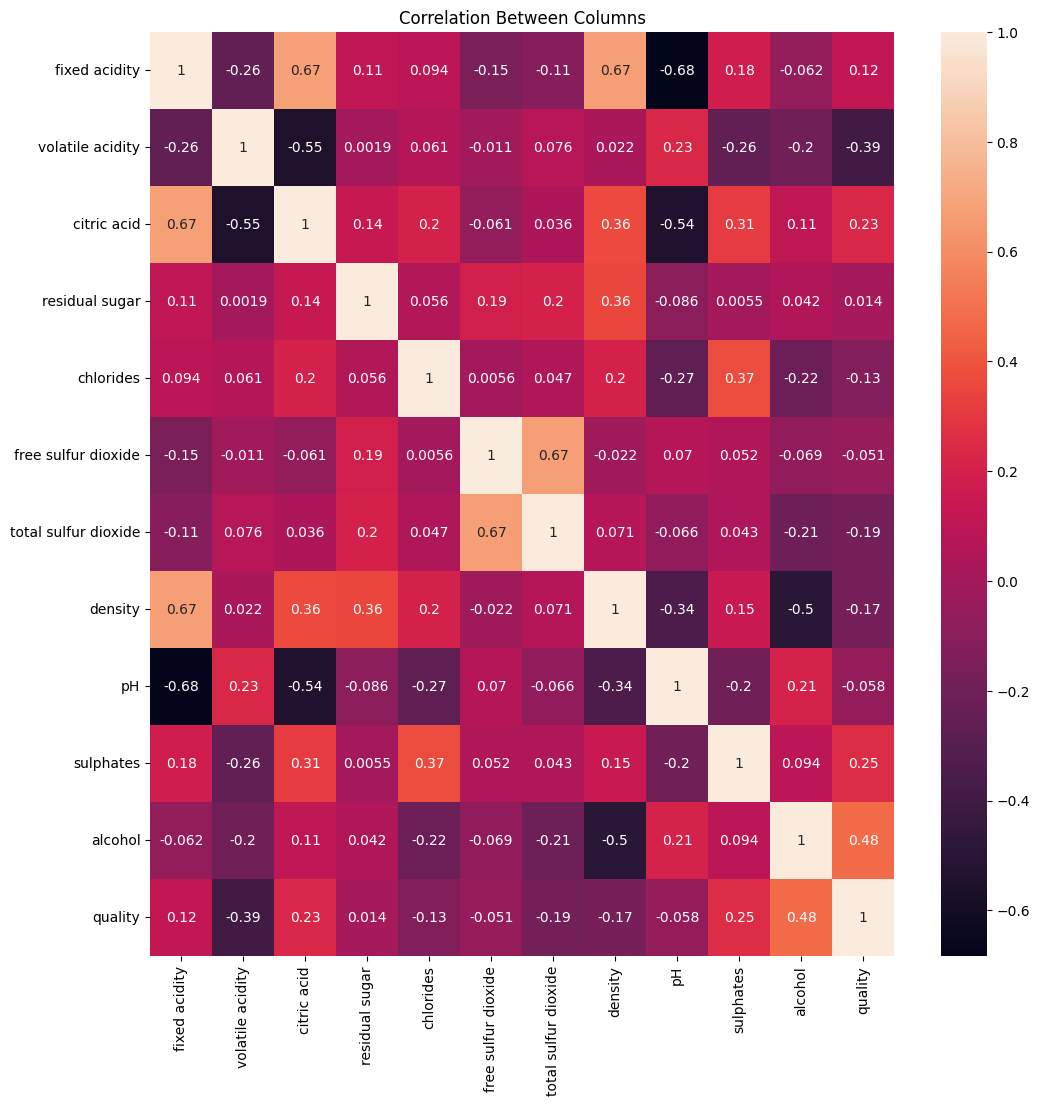

In [193]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.title('Correlation Between Columns')
plt.show()

In [194]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

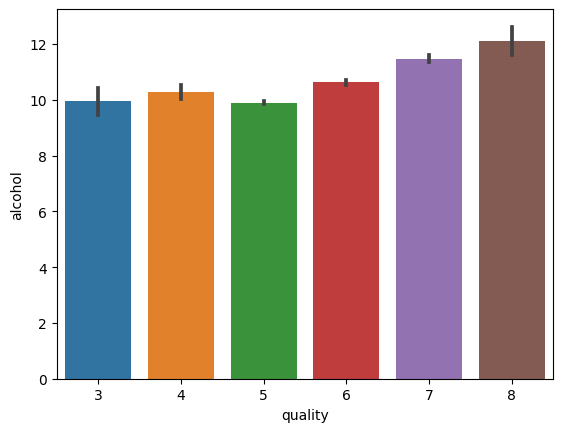

In [195]:
sns.barplot(df['quality'], df['alcohol'])

In [196]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Processing

<AxesSubplot:title={'center':'Quality vs Alcohol'}, xlabel='quality', ylabel='alcohol'>

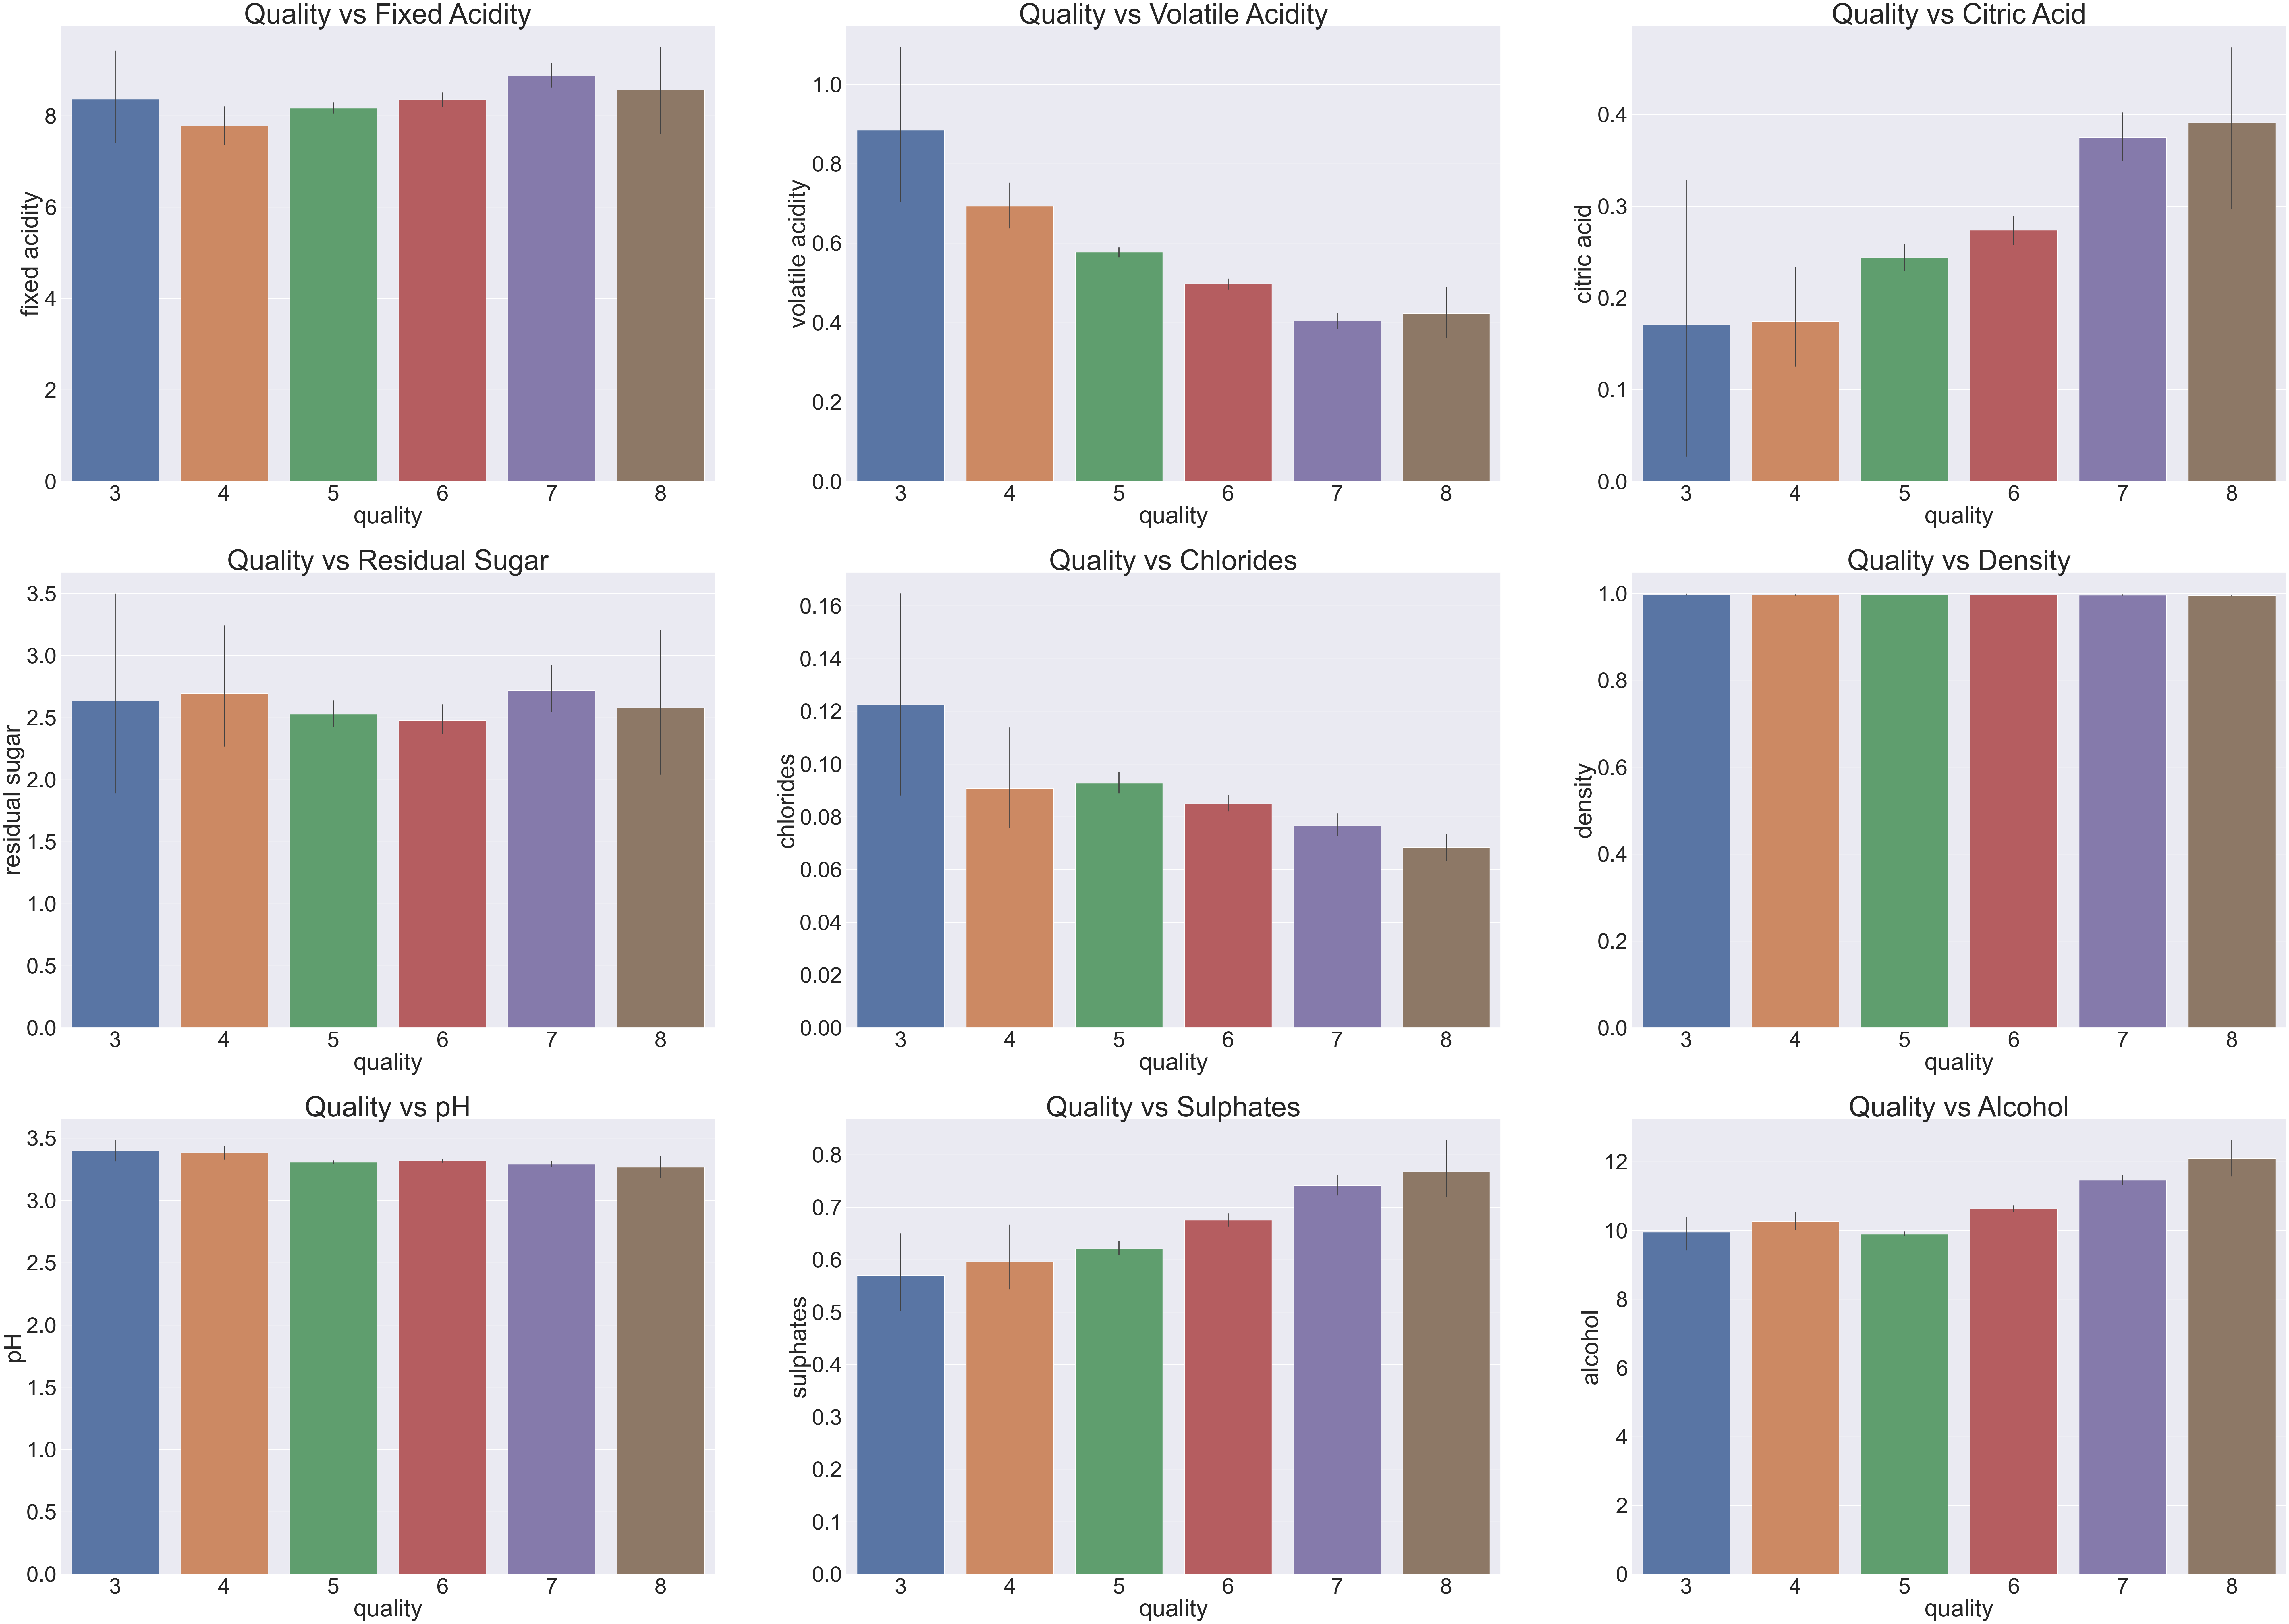

In [197]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity", fontsize=70)
sns.barplot(x='quality', y='fixed acidity', data=df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity", fontsize=70)
sns.barplot(x='quality', y='volatile acidity', data=df)

plt.subplot(333)
plt.title("Quality vs Citric Acid", fontsize=70)
sns.barplot(x='quality', y='citric acid', data=df)

plt.subplot(334)
plt.title("Quality vs Residual Sugar", fontsize=70)
sns.barplot(x='quality', y='residual sugar', data=df)

plt.subplot(335)
plt.title("Quality vs Chlorides", fontsize=70)
sns.barplot(x='quality', y='chlorides', data=df)

plt.subplot(336)
plt.title("Quality vs Density", fontsize=70)
sns.barplot(x='quality', y='density', data=df)

plt.subplot(337)
plt.title("Quality vs pH", fontsize=70)
sns.barplot(x='quality', y='pH', data=df)

plt.subplot(338)
plt.title("Quality vs Sulphates", fontsize=70)
sns.barplot(x='quality', y='sulphates', data=df)

plt.subplot(339)
plt.title("Quality vs Alcohol", fontsize=70)
sns.barplot(x='quality', y='alcohol', data=df)

In [198]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [199]:
label_quality = LabelEncoder()

In [200]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [201]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Quality vs Count'}, xlabel='quality', ylabel='count'>

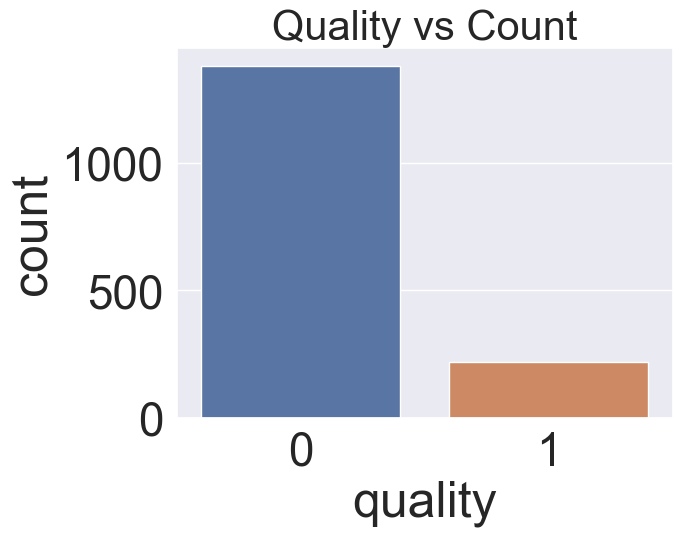

In [202]:
plt.Figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count", fontsize=30)
sns.countplot(df['quality'])

In [203]:
X = df.drop('quality', axis=1)
y = df['quality']

In [204]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [205]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [213]:
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

X_train  (1279, 11)
X_test  (320, 11)
y_train  (1279,)
y_test  (320,)


In [218]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training

In [219]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 90.31%


In [220]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.48      0.40      0.44        30

    accuracy                           0.90       320
   macro avg       0.71      0.68      0.69       320
weighted avg       0.90      0.90      0.90       320



TN:  13
FN:  18
TP:  12
FP:  13


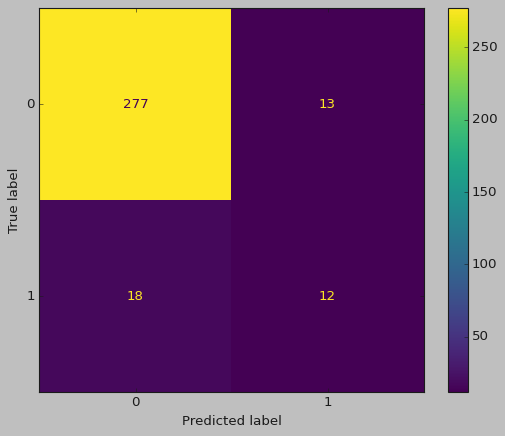

In [228]:
from matplotlib import  style
plt.style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][1])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### The accuracy of the model is 90%, it shows the model is well trained and work properly



<center>
<h2><b>The End</b></h2>
------------------------------------------------------------------------------------------------------------------------------------------
</center>